In [ ]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/Pima.csv",header=None,names=["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age","Y"])

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Y
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
print(df.shape)

(768, 9)


In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Y'],
      dtype='object')

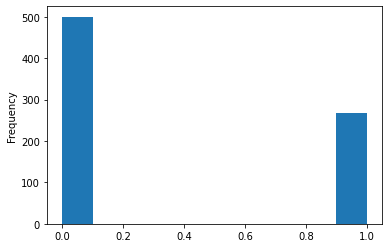

In [ ]:
df["Y"].plot.hist()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,0:8],df["Y"], test_size=0.2, random_state=0)


Text(0, 0.5, 'Accuracy')

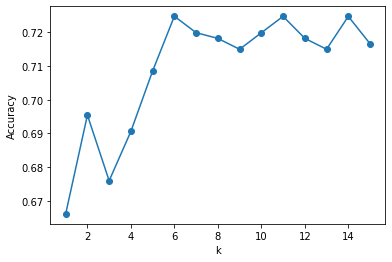

In [ ]:
accur=[]
x=[]
for k in range(1,16):
  knn = KNeighborsClassifier(n_neighbors=k)
  dic = cross_validate(knn,X_train, y_train, cv=5)
  accur.append(np.mean(dic["test_score"]))
  x.append(k)
plt.plot(x,accur,marker='o')
plt.xlabel("k")
plt.ylabel("Accuracy")

In [ ]:
print(accur[6], accur[11], accur[14])

0.7199386911901906 0.7182593629214982 0.7166600026656005


As clearly seen from the graphs and the printed values above, picking k = 6 is the best option. Even though k=11, 14 come close to k=6 in accuracy, we'll be only increasing the running time of the algorithm

In [ ]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(knn.score(X_test,y_test))
print(f"The test error is {(100*(1-knn.score(X_test,y_test))):.3f}%")

0.7792207792207793
The test error is 22.078%


In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(X_train, y_train)
scaler = StandardScaler()
x_test = scaler.fit_transform(X_test, y_test)
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print(knn.score(x_test,y_test))
print(f"The test error is {(100*(1-knn.score(x_test,y_test))):.3f}%")

0.7922077922077922
The test error is 20.779%


Yes, centralization and standardization do impact the accuracy. Standardizing the features around the center and 0 with a standard deviation of 1 is important when we compare measurements that have different values. Variables that are measured at different scales do not contribute equally to the analysis and might end up creating a bais.